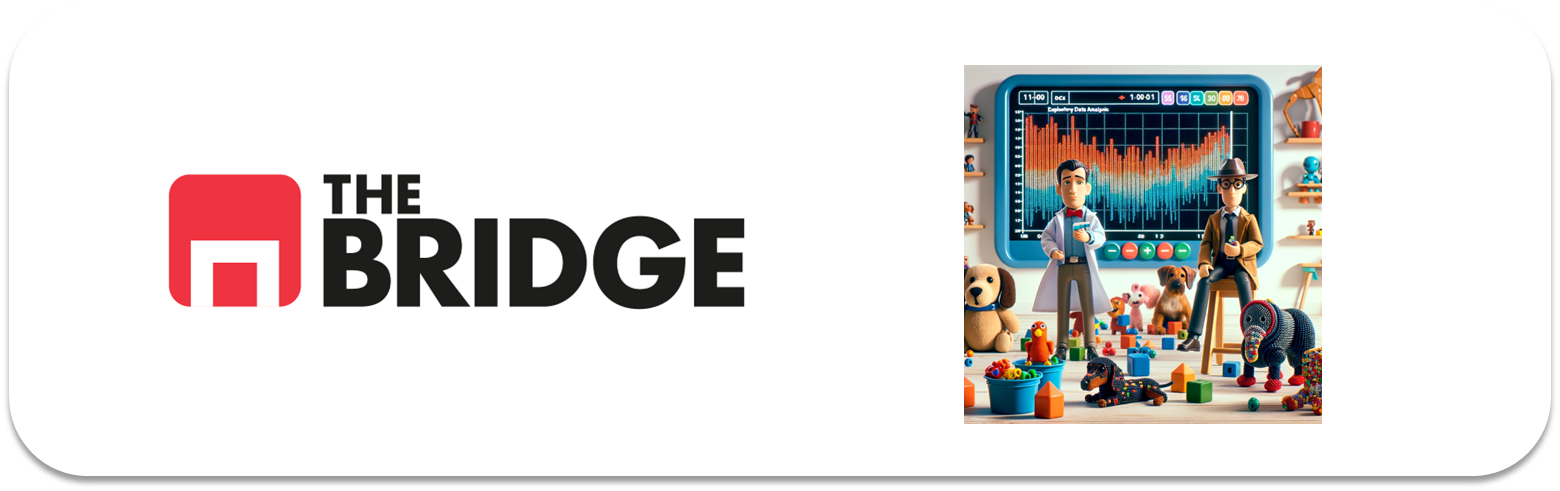

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df_titanic.head()

df_titanic.info()

df_titanic.describe()

df_titanic.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [5]:
df_titanic = df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"])
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

df_titanic = df_titanic.drop(columns=["parch", "sibsp"])

df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
# Calculo la moda de embark_town
moda_embark_town = df_titanic["embark_town"].mode()[0]

# Imputo los valores nulos con la moda
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda_embark_town)

# Verifico si quedan valores nulos
df_titanic["embark_town"].isnull().sum()

0

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
mean_age = df_titanic["age"].mean()

df_titanic["age"] = df_titanic["age"].fillna(mean_age)


df_titanic["age"].isnull().sum()

0

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [68]:
#1. En terminos absolutos y relativos, ¿sobrevivieron más hombres, mujeres o niños?
# Conteo de supervivientes por categoría de "who"
abs_survival = df_titanic[df_titanic["alive"] == "yes"]["who"].value_counts()
rel_survival = df_titanic[df_titanic["alive"] == "yes"]["who"].value_counts(normalize=True) * 100

print("Supervivientes en terminos absolutos:\n", abs_survival)
print("Supervivientes en tirminos relativos (%):\n", rel_survival)

Supervivientes en terminos absolutos:
 who
woman    205
man       88
child     49
Name: count, dtype: int64
Supervivientes en tirminos relativos (%):
 who
woman    59.941520
man      25.730994
child    14.327485
Name: proportion, dtype: float64


In [17]:
#2. En términos absolutos y relativos, ¿de qué clase sobrevivieron más pasajeros?
# Conteo de supervivientes por "class"
abs_class_survival = df_titanic[df_titanic["alive"] == "yes"]["class"].value_counts()
rel_class_survival = df_titanic[df_titanic["alive"] == "yes"]["class"].value_counts(normalize=True) * 100

print("Supervivientes por clase en términos absolutos:\n", abs_class_survival)
print("Supervivientes por clase en términos relativos (%):\n", rel_class_survival)

Supervivientes por clase en términos absolutos:
 class
First     136
Third     119
Second     87
Name: count, dtype: int64
Supervivientes por clase en términos relativos (%):
 class
First     39.766082
Third     34.795322
Second    25.438596
Name: proportion, dtype: float64


In [19]:
#3. ¿De qué ciudad sobrevivieron más personas y porcentualmente de cuál sobrevivieron más?
# Conteo de supervivientes por "embark_town"
abs_city_survival = df_titanic[df_titanic["alive"] == "yes"]["embark_town"].value_counts()
rel_city_survival = df_titanic[df_titanic["alive"] == "yes"]["embark_town"].value_counts(normalize=True) * 100

print("Supervivientes por ciudad en términos absolutos:\n", abs_city_survival)
print("Supervivientes por ciudad en términos relativos (%):\n", rel_city_survival)

Supervivientes por ciudad en términos absolutos:
 embark_town
Southampton    219
Cherbourg       93
Queenstown      30
Name: count, dtype: int64
Supervivientes por ciudad en términos relativos (%):
 embark_town
Southampton    64.035088
Cherbourg      27.192982
Queenstown      8.771930
Name: proportion, dtype: float64


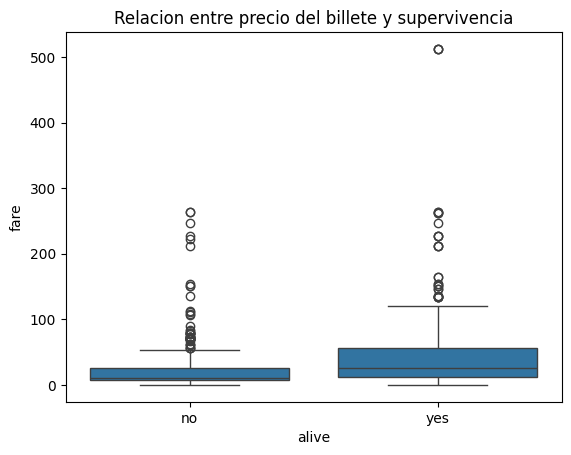

In [67]:
#4. Relación entre el precio del billete y la supervivencia
sns.boxplot(x="alive", y="fare", data=df_titanic)
plt.title("Relacion entre precio del billete y supervivencia")
plt.show()

In [30]:
#5. Pasajeros que no pagaron
no_fare_passengers = df_titanic[df_titanic["fare"] == 0]
no_fare_passengers

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
466,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
481,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,29.699118,0.0,First,man,True,Southampton,no,True,0


In [32]:
#Mayor pagador:
max_fare = df_titanic["fare"].max()
max_fare_passenger = df_titanic[df_titanic["fare"] == max_fare]
max_fare_passenger

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


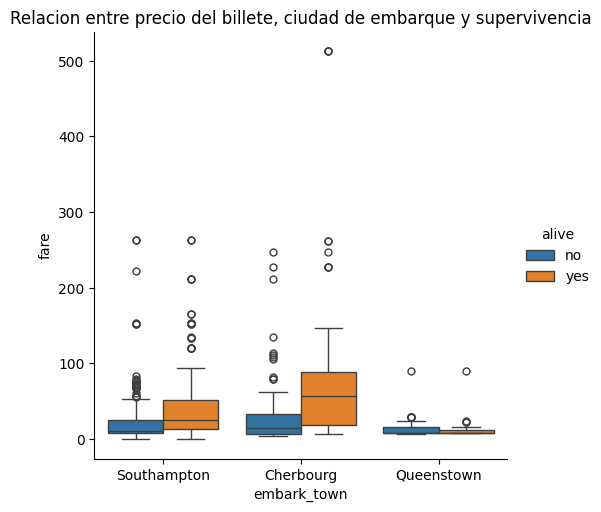

In [66]:
#6. Relación entre precio del billete, ciudad de embarque y supervivencia
sns.catplot(data=df_titanic, x="embark_town", y="fare", hue="alive", kind="box")
plt.title("Relacion entre precio del billete, ciudad de embarque y supervivencia")
plt.show()

In [34]:
#7. Relación entre supervivencia, clase y edad
#Categorías de edad
df_titanic["age_group"] = pd.cut(df_titanic["age"], bins=[0, 18, 60, 100], labels=["child", "adult", "senior"])

# Conteo por clase y grupo de edad
survival_group = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "age_group"]).size()
survival_group

class   age_group
First   child         14
        adult        119
        senior         3
Second  child         23
        adult         63
        senior         1
Third   child         33
        adult         85
        senior         1
dtype: int64

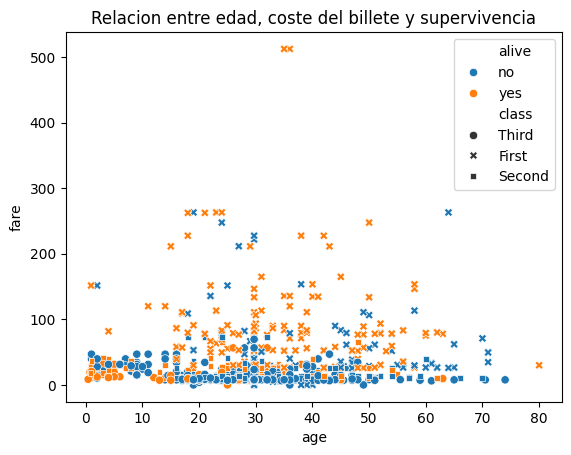

In [65]:
#8. Relación entre edad, coste del billete y supervivencia
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", style="class")
plt.title("Relacion entre edad, coste del billete y supervivencia")
plt.show()

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [44]:
# Cargo del dataset
df_travel = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_travel.info()
df_travel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


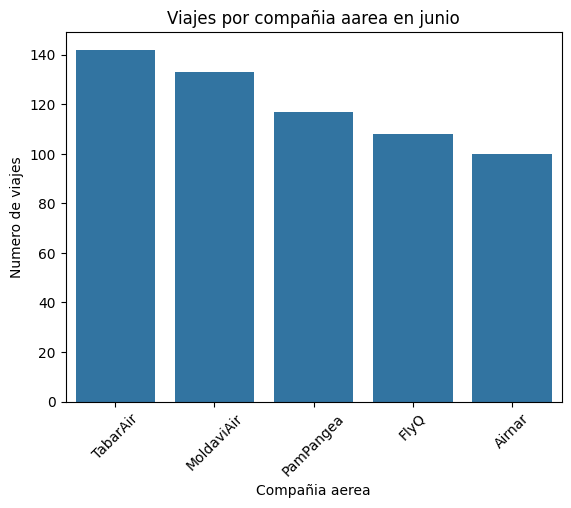

In [64]:
#Visualización de los viajes por compañía aérea
aircompany_counts = df_travel["aircompany"].value_counts()

# Visualizacion
sns.barplot(x=aircompany_counts.index, y=aircompany_counts.values)
plt.title("Viajes por compañia aarea en junio")
plt.xlabel("Compañia aerea")
plt.ylabel("Numero de viajes")
plt.xticks(rotation=45)
plt.show()

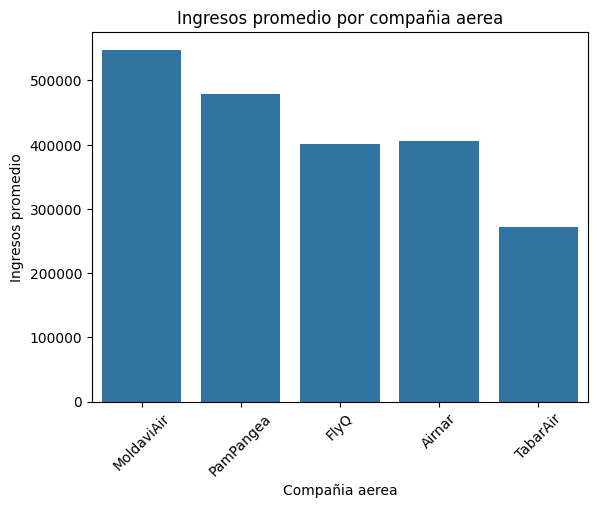

In [63]:
#Análisis bivariante entre "aircompany" y "ingresos"
# Resumen de ingresos por aerolínea
income_summary = df_travel.groupby("aircompany")["ingresos"].agg(["mean", "median", "sum", "count"]).sort_values(by="sum", ascending=False)
income_summary

# Visualizacion
sns.barplot(data=income_summary.reset_index(), x="aircompany", y="mean", order=income_summary.index)
plt.title("Ingresos promedio por compañia aerea")
plt.xlabel("Compañia aerea")
plt.ylabel("Ingresos promedio")
plt.xticks(rotation=45)
plt.show()

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

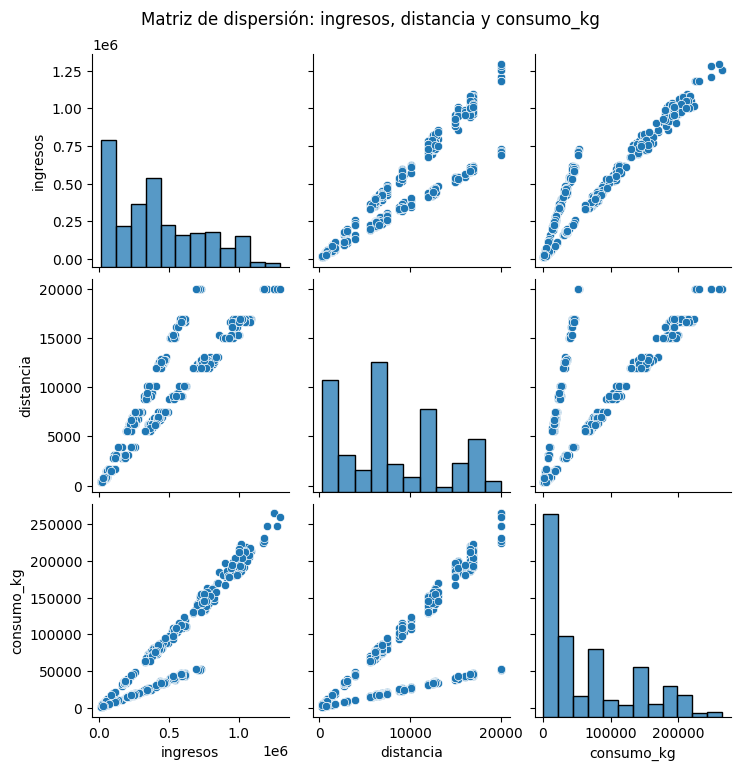

In [62]:
# ver relación entre las tres variables
sns.pairplot(df_travel[["ingresos", "distancia", "consumo_kg"]])
plt.suptitle("Matriz de dispersión: ingresos, distancia y consumo_kg", y=1.02)
plt.show()

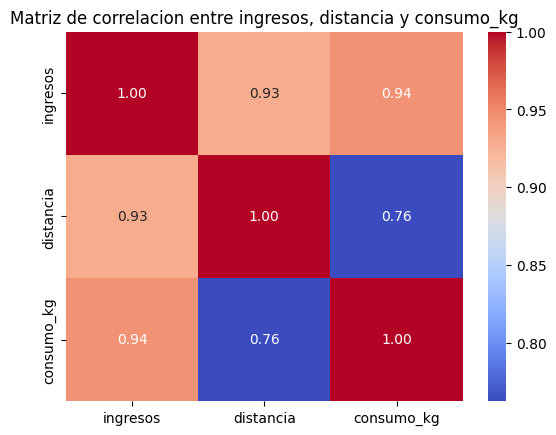

In [61]:
# Matriz de correlación
correlation_matrix = df_travel[["ingresos", "distancia", "consumo_kg"]].corr()

# Visualizacion
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlacion entre ingresos, distancia y consumo_kg")
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

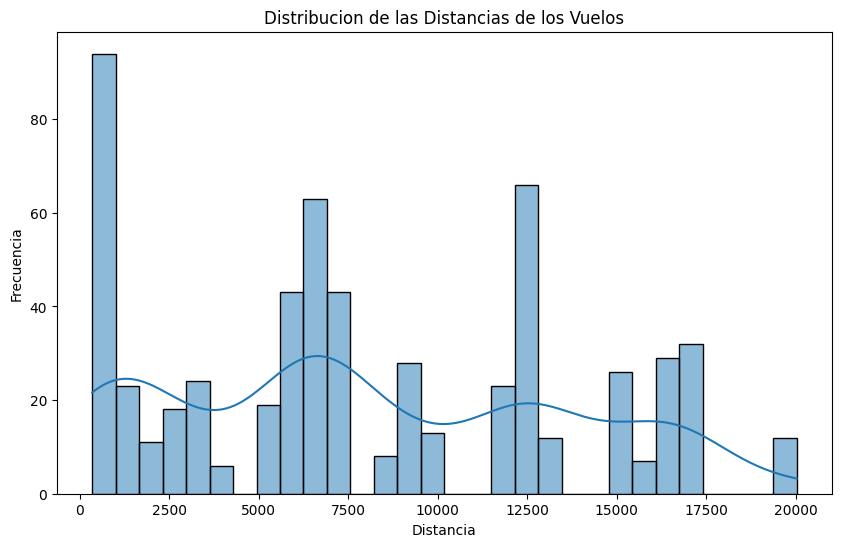

In [60]:
# Ver distribución de la variable "Distancias"
plt.figure(figsize=(10, 6))
sns.histplot(df_travel["distancia"], kde=True, bins=30)
plt.title("Distribucion de las Distancias de los Vuelos")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.show()

In [57]:
#Corto: entre 0 y 1,000 km
#Medio: entre 1,000 y 2,500 km
#Largo: entre 2,500 y 5,000 km
#Extra-largo: mas de 5,000 km

# Defino rangos para la variable cat_vuelo
bins = [0, 1000, 2500, 5000, np.inf]  # limites de los rangos
labels = ["Corto", "Medio", "Largo", "Extra-largo"]  # etiquetas

# nueva variable cat_vuelo
df_travel["cat_vuelo"] = pd.cut(df_travel["distancia"], bins=bins, labels=labels)

# Verifico
df_travel[["distancia", "cat_vuelo"]].head()

,distancia,cat_vuelo
0,411,Corto
1,12738,Extra-largo
2,9103,Extra-largo
3,6370,Extra-largo
4,7480,Extra-largo


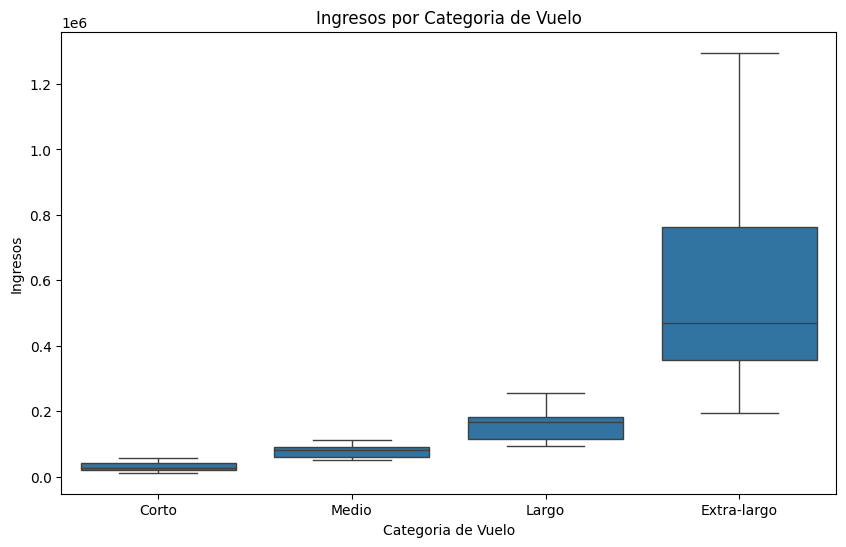

In [58]:
#Grafico para ingresos por cat_vuelo:
plt.figure(figsize=(10, 6))
sns.boxplot(x="cat_vuelo", y="ingresos", data=df_travel)
plt.title("Ingresos por Categoria de Vuelo")
plt.xlabel("Categoria de Vuelo")
plt.ylabel("Ingresos")
plt.show()

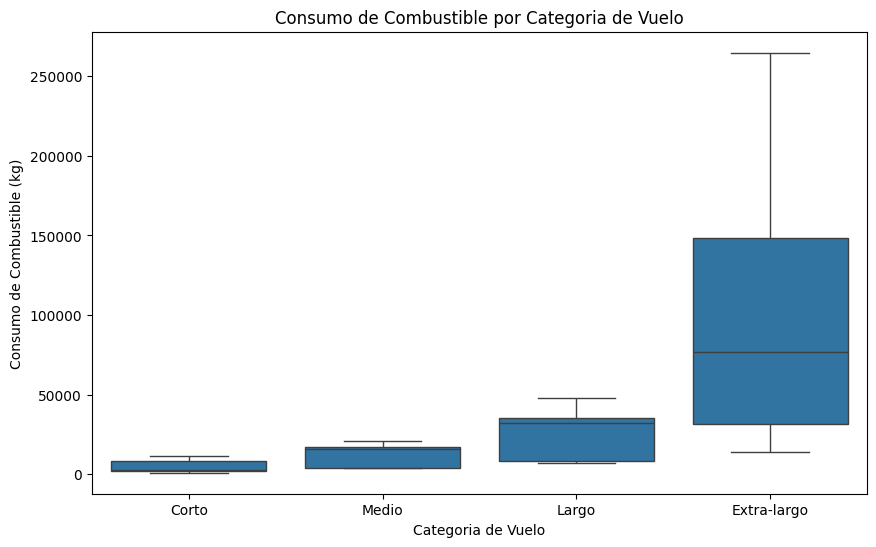

In [59]:
#Grafico para consumo_kg por cat_vuelo:
plt.figure(figsize=(10, 6))
sns.boxplot(x="cat_vuelo", y="consumo_kg", data=df_travel)
plt.title("Consumo de Combustible por Categoria de Vuelo")
plt.xlabel("Categoria de Vuelo")
plt.ylabel("Consumo de Combustible (kg)")
plt.show()

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.